<a href="https://colab.research.google.com/github/malarkeyfrancis/geeks_for_geeks_ML_exercises/blob/main/healthcare/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease using Logistic Regression

Our goal is to use Logistic Regression to predict a 10 year risk of future coronary heart disease. We will


In [2]:
# Import datasets

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlip inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# Data Preparation and loading


In [4]:
#dataset loading

disease_df = pd.read_csv('/content/drive/MyDrive/datasets/CHD_prediction/framingham.csv')
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


We do not need all of these columns for our analysis so lets drop some of them.

In [5]:
disease_df.drop(['education'], inplace=True, axis=1)
disease_df.rename(columns={'male':'Sex_male'}, inplace=True)
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Next lets check if there are any nulls or NaNs in our data and drop them where necessary.

In [6]:
disease_df.dropna(axis= 0, inplace= True)
print(disease_df.head, disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

<bound method NDFrame.head of       Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   
...        ...  ...            ...         ...     ...              ...   
4233         1   50              1         1.0     0.0                0   
4234         1   51              1        43.0     0.0                0   
4237         0   52              0         0.0     0.0                0   
4238         1   40              0         0.0     0.0                0   
4239         0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate

So the TenYearCHD column is our classifier, and is already set as an int64. Good to see. We will need to split our data in test and training datasets now.

In [7]:
# Assign your groups

X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay','totChol','sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# We need to normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


Lets take a look at the TenYearCHD output and see what we can find.

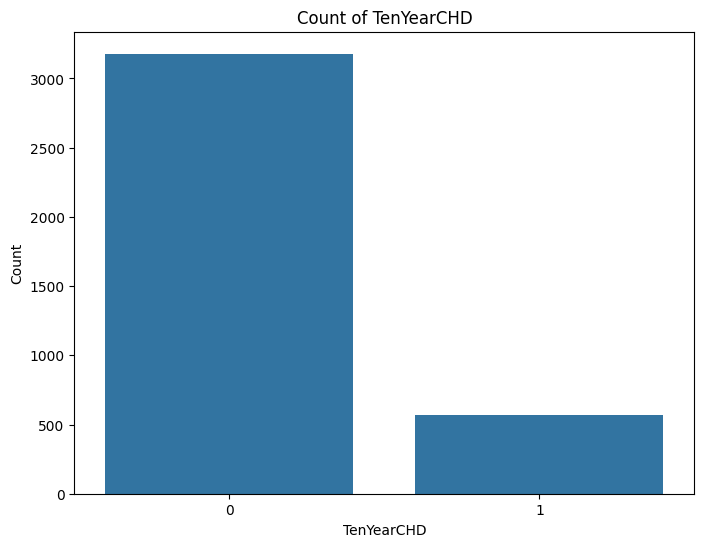

In [8]:
# Plot TenYearCHD from disease_df as a countplot

plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=disease_df)
plt.title('Count of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

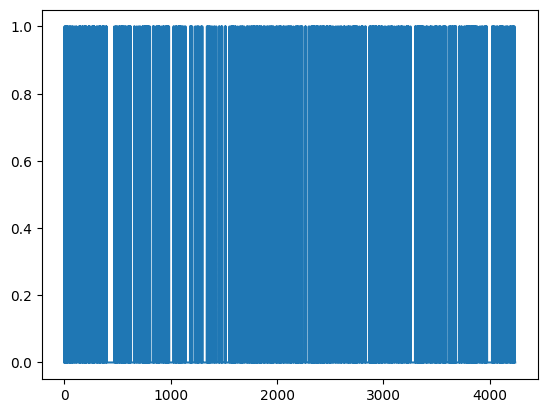

In [9]:
laste = disease_df['TenYearCHD'].plot()
plt.show()

In [12]:
# Lets fit the model for Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluating the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8490230905861457
[[942   9]
 [161  14]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



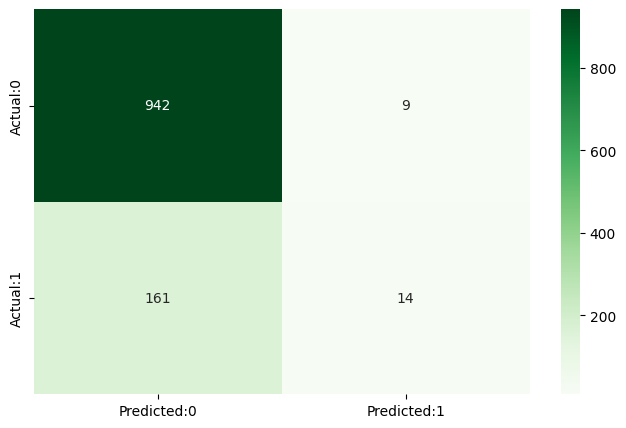

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [14]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))
